<a href="https://colab.research.google.com/github/Jkanishkha0305/Covid-19/blob/main/CNN_And_VGG19_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Creating a CNN model from Scratch And Using Transfer Learning(VGG-19) and choosing the best model

In [ ]:
#mounting the drive so that it will be easier to read datasets and no need to upload in the colab everytime
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing the requiredlibraries 

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'drive/MyDrive/Colab_Assignments/ML/CovidDataset/Train'
valid_path = 'drive/MyDrive/Colab_Assignments/ML/CovidDataset/Test'


Creating a CNN Model from Scratch

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
### Create Model architecture from scratch using CNN (5 layers)
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# We use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Here we are augmenting the images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Creating trainset with image size of dimension (224,224)
training_set = train_datagen.flow_from_directory('drive/MyDrive/Colab_Assignments/ML/CovidDataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 224 images belonging to 2 classes.


In [ ]:
training_set

In [ ]:
# Creating testset with image size of dimension (224,224)
test_set = test_datagen.flow_from_directory('drive/MyDrive/Colab_Assignments/ML/CovidDataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 60 images belonging to 2 classes.


In [ ]:
# fit the model
# Training the model with 50 epochs
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
7/7 [==============================] - 48s 6s/step - loss: 1.8525 - accuracy: 0.5982 - val_loss: 0.5027 - val_accuracy: 0.7000
Epoch 2/50
7/7 [==============================] - 9s 1s/step - loss: 0.5726 - accuracy: 0.7232 - val_loss: 0.3116 - val_accuracy: 0.9167
Epoch 3/50
7/7 [==============================] - 9s 1s/step - loss: 0.3565 - accuracy: 0.8259 - val_loss: 0.2182 - val_accuracy: 0.9500
Epoch 4/50
7/7 [==============================] - 9s 1s/step - loss: 0.3104 - accuracy: 0.8527 - val_loss: 0.1846 - val_accuracy: 0.9667
Epoch 5/50
7/7 [==============================] - 9s 1s/step - loss: 0.2791 - accuracy: 0.8795 - val_loss: 0.1512 - val_accuracy: 0.9500
Epoch 6/50
7/7 [==============================] - 9s 1s/step - loss: 0.2020 - accuracy: 0.9196 - val_loss: 0.1272 - val_accuracy: 0.9667
Epoch 7/50
7/7 [==============================] - 9s 1s/step - loss: 0.1397 - accuracy: 0.9598 - val_loss: 0.1107 - val_accuracy: 0.9667
Epoch 8/50
7/7 [========================

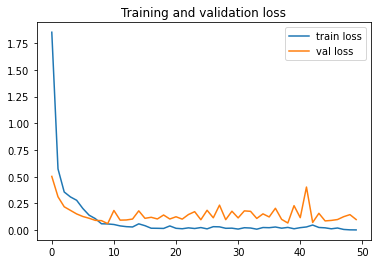

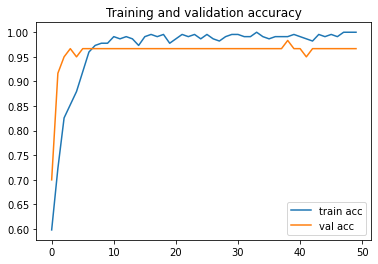

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
loss,accuracy = model.evaluate(test_set)

2/2 [==============================] - 2s 580ms/step - loss: 0.0987 - accuracy: 0.9667


In [ ]:
print("test accuracy: "+ str(accuracy*100))
print("test loss: "+ str(loss*100))

test accuracy: 96.66666388511658
test loss: 9.86519306898117


In [ ]:
# save the model as a h5 file

from tensorflow.keras.models import load_model

model.save('drive/MyDrive/Colab_Assignments/ML/CNN.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[9.99982476e-01, 1.74780726e-05],
       [9.99992371e-01, 7.58701026e-06],
       [1.07392509e-06, 9.99998927e-01],
       [9.99507546e-01, 4.92419349e-04],
       [9.99999523e-01, 4.31149374e-07],
       [9.99997497e-01, 2.49141203e-06],
       [1.13143551e-06, 9.99998927e-01],
       [9.86491621e-01, 1.35084027e-02],
       [9.99999762e-01, 1.92869251e-07],
       [8.84559512e-01, 1.15440451e-01],
       [8.67007515e-08, 9.99999881e-01],
       [2.48759206e-05, 9.99975085e-01],
       [5.89865112e-06, 9.99994159e-01],
       [1.00000000e+00, 3.87292820e-09],
       [9.85437989e-01, 1.45620164e-02],
       [3.22919675e-07, 9.99999642e-01],
       [9.99928474e-01, 7.15000351e-05],
       [2.45613342e-06, 9.99997497e-01],
       [7.65128476e-08, 9.99999881e-01],
       [1.44243870e-06, 9.99998569e-01],
       [3.83571605e-04, 9.99616385e-01],
       [9.99999881e-01, 6.81303831e-08],
       [1.00000000e+00, 1.15354872e-08],
       [9.99996185e-01, 3.87163391e-06],
       [6.613286

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('drive/MyDrive/Colab_Assignments/ML/CNN.h5')

In [ ]:
#img=image.load_img('drive/MyDrive/Colab_Assignments/ML/CovidDataset/Test/Normal/NORMAL2-IM-0894-0001.jpeg',target_size=(224,224))

img=image.load_img('drive/MyDrive/Colab_Assignments/ML/CovidDataset/Test/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg',target_size=(224,224))


In [ ]:
x=image.img_to_array(img)
x

array([[[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        ...,
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.],
        [ 0.,  0.,  0.]],

       ...,

       [[37., 37., 37.],
        [32., 32., 32.],
        [35., 35., 35.],
        ...,
        [55., 55., 55.],
        [43., 43., 43.],
        [55., 55., 55.]],

       [[32., 32., 32.],
        [30., 30., 30.],
        [35., 35., 35.],
        ...,
        [55., 55., 55.],
        [43., 43., 43.],
        [55., 55., 55.]],

       [[30., 30., 30.],
        [27., 27., 27.],
        [32., 32., 32.],
        ...,
        [55., 55., 55.],
        [43., 43., 43.],
        [55., 55., 55.]]

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
if(a==1):
    print("COVID-19 Negative")
else:
    print("COVID-19 Positive")

COVID-19 Positive


Creating a VGG19 Model

In [ ]:
vgg19 = VGG19(input_shape = IMAGE_SIZE + [3],weights = 'imagenet',include_top = False)

In [ ]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [ ]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Creating trainset with image size of dimension (224,224)
training_set = train_datagen.flow_from_directory('drive/MyDrive/Colab_Assignments/ML/CovidDataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [ ]:
training_set

In [ ]:
# Creating testset with image size of dimension (224,224)
test_set = test_datagen.flow_from_directory('drive/MyDrive/Colab_Assignments/ML/CovidDataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model..fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 13 steps, validate for 5 steps
Epoch 1/50
13/13 [==============================] - 6s 490ms/step - loss: 1.4529 - accuracy: 0.5048 - val_loss: 0.9426 - val_accuracy: 0.4179
Epoch 2/50
13/13 [==============================] - 6s 498ms/step - loss: 0.7403 - accuracy: 0.6010 - val_loss: 0.6418 - val_accuracy: 0.6791
Epoch 3/50
13/13 [==============================] - 6s 495ms/step - loss: 0.5256 - accuracy: 0.7524 - val_loss: 0.9822 - val_accuracy: 0.5224
Epoch 4/50
13/13 [==============================] - 6s 459ms/step - loss: 0.4426 - accuracy: 0.7788 - val_loss: 0.4205 - val_accuracy: 0.7761
Epoch 5/50
13/13 [==============================] - 6s 466ms/step - loss: 0.3296 - accuracy: 0.8630 - val_loss: 0.5563 - val_accuracy: 0.7015
Epoch 6/50
13/13 [==============================] - 6s 473ms/step - loss: 0.3186 - accuracy: 0.8654 - val_loss: 0.3651 - val_accuracy: 0.8358
Epoch 7/50
13/13 [==============================] - 6s 46

KeyboardInterrupt: 

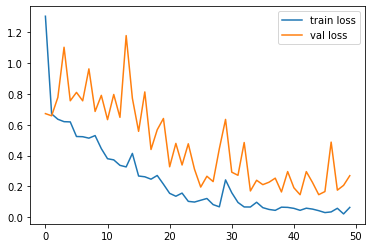

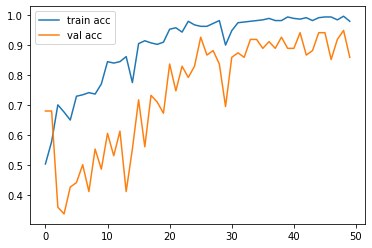

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
loss,accuracy = model.evaluate(test_set)

2/2 [==============================] - 4s 1s/step - loss: 0.2890 - accuracy: 0.9667


In [ ]:
print("test accuracy: "+ str(accuracy*100))
print("test loss: "+ str(loss*100))

test accuracy: 96.66666388511658
test loss: 28.90319526195526


In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[9.99876857e-01, 1.23175341e-04],
       [9.99977112e-01, 2.29190919e-05],
       [7.58346558e-01, 2.41653457e-01],
       [9.99925494e-01, 7.45595753e-05],
       [9.90784764e-01, 9.21520963e-03],
       [9.12076458e-02, 9.08792377e-01],
       [2.70295113e-01, 7.29704857e-01],
       [3.21944878e-02, 9.67805505e-01],
       [9.62613881e-01, 3.73861678e-02],
       [5.13265312e-01, 4.86734688e-01],
       [9.87143576e-01, 1.28563549e-02],
       [9.97780263e-01, 2.21971911e-03],
       [9.32238042e-01, 6.77619576e-02],
       [9.21115577e-01, 7.88843632e-02],
       [3.17853913e-02, 9.68214571e-01],
       [1.00000000e+00, 9.47071488e-09],
       [2.65438944e-01, 7.34561086e-01],
       [9.99419808e-01, 5.80202264e-04],
       [9.40651655e-01, 5.93483634e-02],
       [9.85742450e-01, 1.42575456e-02],
       [9.99954581e-01, 4.54339461e-05],
       [9.99656916e-01, 3.43117106e-04],
       [5.88945560e-02, 9.41105425e-01],
       [9.99902725e-01, 9.72729686e-05],
       [7.317669

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1], dtype=int64)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg19.h5')

In [ ]:
#img=image.load_img('drive/MyDrive/Colab_Assignments/ML/CovidDataset/Test/Normal/NORMAL2-IM-0894-0001.jpeg',target_size=(224,224))

img=image.load_img('drive/MyDrive/Colab_Assignments/ML/CovidDataset/Test/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg',target_size=(224,224))


In [ ]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.01155142, 0.98844856]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
if(a==1):
    print("Infected")
else:
    print("Uninfected")

Uninfected


Run webapp

In [ ]:

from __future__ import division, print_function
# coding=utf-8
import sys
import os
import glob
import re
import numpy as np

# Keras
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Flask utils
from flask import Flask, redirect, url_for, request, render_template
from werkzeug.utils import secure_filename
#from gevent.pywsgi import WSGIServer

# Define a flask app
app = Flask(__name__)

# Model saved with Keras model.save()
MODEL_PATH ='drive/MyDrive/Colab_Assignments/ML/CNN.h5'

# Load your trained model
model = load_model(MODEL_PATH)





def model_predict(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))

    # Preprocessing the image
    x = image.img_to_array(img)
    # x = np.true_divide(x, 255)
    ## Scaling
    x=x/255
    x = np.expand_dims(x, axis=0)
   

    # Be careful how your trained model deals with the input
    # otherwise, it won't make correct prediction!
    x = preprocess_input(x)

    preds = model.predict(x)
    preds=np.argmax(preds, axis=1)
    if preds==0:
        preds="The Person is COVID-19 +VE"
    else:
        preds="The Person is COVID-19 -VE"
    
    
    return preds


@app.route('/', methods=['GET'])
def index():
    # Main page
    return render_template('drive/MyDrive/Colab_Assignments/ML/templates/index.html')


@app.route('/predict', methods=['GET', 'POST'])
def upload():
    if request.method == 'POST':
        # Get the file from post request
        f = request.files['file']

        # Save the file to ./uploads
        basepath = os.path.dirname(__file__)
        file_path = os.path.join(
            basepath, 'uploads', secure_filename(f.filename))
        f.save(file_path)

        # Make prediction
        preds = model_predict(file_path, model)
        result=preds
        return result
    return None


if __name__ == '__main__':
    app.run(debug=True)
